In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np
df = pd.read_csv("County_Health_Rankings.csv")
df.head(5)

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,Confidence Interval Lower Bound,Confidence Interval Upper Bound,Data Release Year,fipscode
0,US,United States,0.0,0.0,2003-2005,Violent crime rate,43.0,1328750.667,274877117.0,483.398066,NaN,NaN,NaN,0.0
1,US,United States,0.0,0.0,2004-2006,Violent crime rate,43.0,1340928.667,277612778.5,483.021233,NaN,NaN,NaN,0.0
2,US,United States,0.0,0.0,2005-2007,Violent crime rate,43.0,1355853.167,280407694.7,483.529230,NaN,NaN,2010.0,0.0
3,US,United States,0.0,0.0,2006-2008,Violent crime rate,43.0,1366928.333,287614567.7,475.263942,NaN,NaN,2011.0,0.0
4,US,United States,0.0,0.0,2007-2009,Violent crime rate,43.0,1339439.333,292576281.2,457.808585,NaN,NaN,2012.0,0.0


In [8]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(303864, 14)
State                               object
County                              object
State code                         float64
County code                        float64
Year span                           object
Measure name                        object
Measure id                         float64
Numerator                          float64
Denominator                        float64
Raw value                          float64
Confidence Interval Lower Bound    float64
Confidence Interval Upper Bound    float64
Data Release Year                  float64
fipscode                           float64
dtype: object
['State code' 'County code' 'Measure id' 'Numerator' 'Denominator'
 'Raw value' 'Confidence Interval Lower Bound'
 'Confidence Interval Upper Bound' 'Data Release Year' 'fipscode']
['State' 'County' 'Year span' 'Measure name']


## Missing data

#### 1) Missing Data Heatmap

<AxesSubplot: >

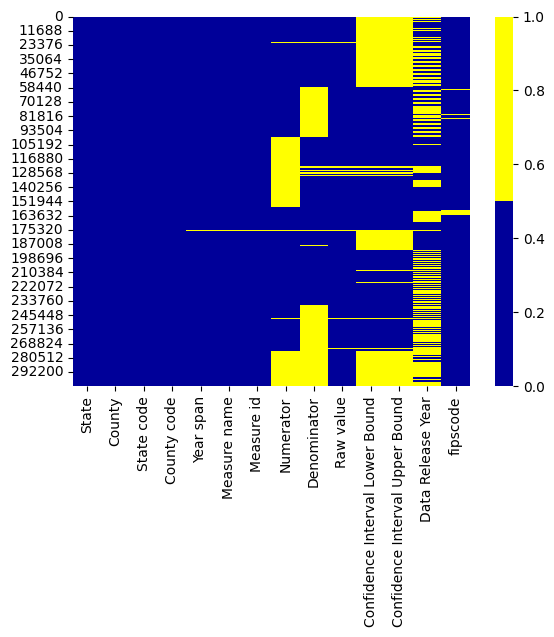

In [9]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#### 2) Missing Data Percentage List

In [10]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

State - 0%
County - 0%
State code - 0%
County code - 0%
Year span - 0%
Measure name - 0%
Measure id - 0%
Numerator - 30%
Denominator - 39%
Raw value - 5%
Confidence Interval Lower Bound - 38%
Confidence Interval Upper Bound - 38%
Data Release Year - 51%
fipscode - 3%


#### 3) Missing Data Histogram

created missing indicator for: State
created missing indicator for: County
created missing indicator for: State code
created missing indicator for: County code
created missing indicator for: Year span
created missing indicator for: Measure name
created missing indicator for: Measure id
created missing indicator for: Numerator
created missing indicator for: Denominator
created missing indicator for: Raw value
created missing indicator for: Confidence Interval Lower Bound
created missing indicator for: Confidence Interval Upper Bound
created missing indicator for: Data Release Year
created missing indicator for: fipscode


<AxesSubplot: xlabel='index'>

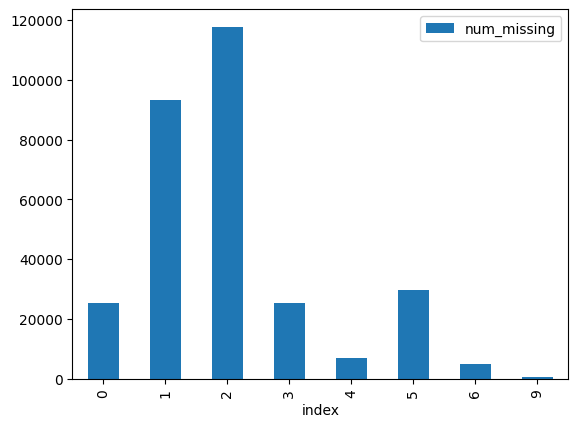

In [11]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


### What to do with missing data?

#### 1) Drop the Observation

In [12]:
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

#### 2) Drop the Feature

In [ ]:
# Data Release Year has a lot of missing.
# If we want to drop.
cols_to_drop = ['Data Release Year']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

#### 3) Impute the Missing

In [ ]:
# replace missing values with the median.
med = df['Numerator'].median()
print(med)
df['Numerator'] = df['Numerator'].fillna(med)

In [13]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: State code
imputing missing values for: County code
imputing missing values for: Measure id
imputing missing values for: Numerator
imputing missing values for: Denominator
imputing missing values for: Raw value
imputing missing values for: Confidence Interval Lower Bound
imputing missing values for: Confidence Interval Upper Bound
imputing missing values for: Data Release Year
imputing missing values for: fipscode


#### 4) Replace the Missing

For categorical features, we can add a new category with a value such as “_MISSING_”. For numerical features, we can replace it with a particular value such as -999.

In [ ]:
# categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')


# numeric
df['life_sq'] = df['life_sq'].fillna(-999)

## Irregular data (Outliers)

Outliers are data that is distinctively different from other observations. They could be real outliers or mistakes.

#### 1) Histgram/ Box Plot

<AxesSubplot: >

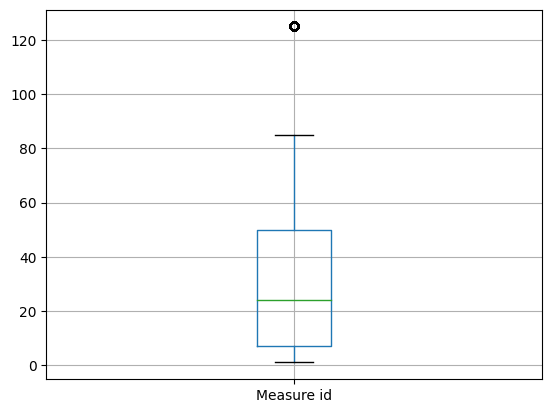

In [15]:
df.boxplot(column=['Measure id'])

#### 2) Descriptive Statistics

In [16]:
df['Measure id'].describe()

count    303864.000000
mean         38.676141
std          36.767294
min           1.000000
25%           7.000000
50%          24.000000
75%          50.000000
max         125.000000
Name: Measure id, dtype: float64

#### 3) Bar Chart

<AxesSubplot: >

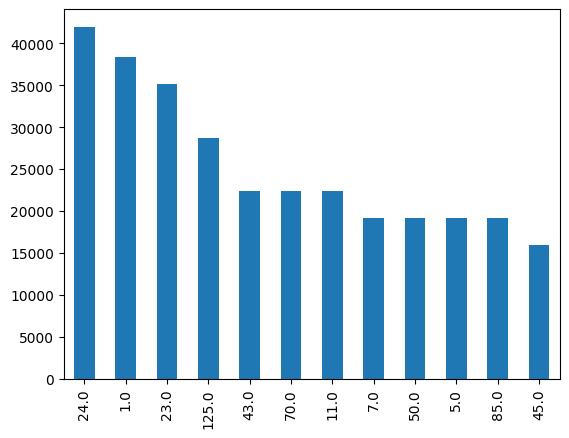

In [18]:
df['Measure id'].value_counts().plot.bar()

## Unnecessary data

#### 1) Uninformative / Repetitive

In [19]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

State_ismissing: 99.99803%
False    303858
True          6
Name: State_ismissing, dtype: int64

County_ismissing: 99.99803%
False    303858
True          6
Name: County_ismissing, dtype: int64

State code_ismissing: 99.99868%
False    303860
True          4
Name: State code_ismissing, dtype: int64

County code_ismissing: 99.99868%
False    303860
True          4
Name: County code_ismissing, dtype: int64

Year span_ismissing: 99.84401%
False    303390
True        474
Name: Year span_ismissing, dtype: int64

Measure name_ismissing: 99.84401%
False    303390
True        474
Name: Measure name_ismissing, dtype: int64

Measure id_ismissing: 99.84401%
False    303390
True        474
Name: Measure id_ismissing, dtype: int64

Raw value_ismissing: 95.42295%
False    289956
True      13908
Name: Raw value_ismissing, dtype: int64

fipscode_ismissing: 96.84694%
False    294283
True       9581
Name: fipscode_ismissing, dtype: int64



#### 2) Duplicates

In [20]:
df_dedupped = df.drop('Measure id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(303864, 29)
(297071, 28)


## Inconsistent data


#### 1) Capitalization

In [30]:
df['County'].value_counts(dropna=False)

Washington County      2850
Jefferson County       2375
Franklin County        2280
Jackson County         2185
Lincoln County         2185
                       ... 
Dorado Municipio          7
Culebra Municipio         7
Corozal Municipio         7
Canovanas Municipio       7
NaN                       6
Name: County, Length: 2009, dtype: int64

In [31]:
# make everything lower case.
df['County'] = df['County'].str.lower()
df['County'].value_counts(dropna=False)

washington county      2850
jefferson county       2375
franklin county        2280
jackson county         2185
lincoln county         2185
                       ... 
dorado municipio          7
culebra municipio         7
corozal municipio         7
canovanas municipio       7
NaN                       6
Name: County, Length: 2009, dtype: int64

#### 2) Formats

In this dataset we dont have date time

In [ ]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

#### 3) Categorical Values

In [ ]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

In [ ]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

#### 4) Addresses

In [ ]:
# no address column in the this dataset. So create one to show the code.
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

In [ ]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

df_add_ex